# Assignment- 1

## **LINEAR REGRESSION**

In [1]:
#import required libraries
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Import the dataset 
df = pd.read_csv('1000_Companies.csv')

In [3]:
#Visualize the data 
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Data Cleaning and EDA

In [4]:
#Shape of the data
df.shape

(1000, 5)

In [5]:
#Lets look at the mean, median (50%),min, max and percentile values of each numerical columns
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,997.000000,1000.000000,1000.000000,1000.000000
mean,81832.857773,122963.897612,226205.058419,119546.164656
std,46507.250766,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43391.000000,116640.684850,150969.584600,85943.198543
50%,80306.000000,122421.612150,224517.887350,117641.466300
75%,124648.000000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [6]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        997 non-null    float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [7]:
#Finding null values of the dataset 
df.isnull().sum()

R&D Spend          3
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
#Visualizing the rows with null values
df[df['R&D Spend'].isnull()]

,R&D Spend,Administration,Marketing Spend,State,Profit
51,NaN,116183.1212,143589.71910,California,82155.48418
55,NaN,114997.5096,128099.67110,New York,75297.23305
64,NaN,112236.9898,92033.40609,Florida,59328.81874


<Axes: >

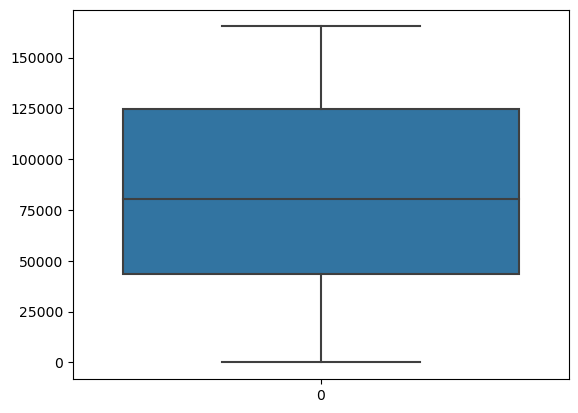

In [9]:
#Visualizing the R&D Spend column data on boxplot.
sns.boxplot(df['R&D Spend'])

### Clearly the 'R&D Spend' column is continuosly distributed and there are no outliers.
### We can replace null values with mean, median but as the number of rows are less(3). Lets drop them

In [10]:
#Dropping the null values
df.dropna(inplace = True)

In [11]:
df.shape

(997, 5)

<Axes: >

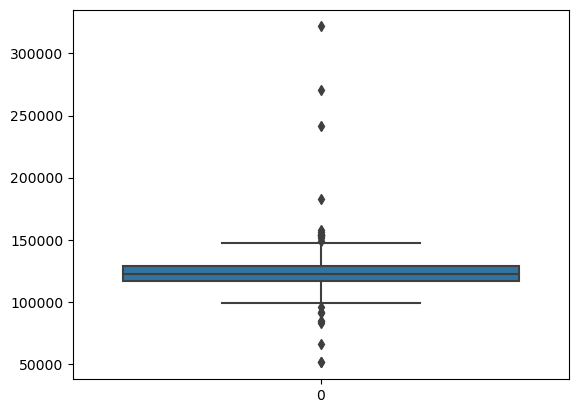

In [12]:
sns.boxplot(df['Administration'])

In [13]:
Q1 = df['Administration'].quantile(0.1) # Q1 is data's 10% 
Q3 = df['Administration'].quantile(0.9) # Q3 is data's 90%
IQR = Q3 - Q1 # Interquartile Range is 50%

lower_bound = Q1 - 1.5 * IQR # outlier's lower bound Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR # outlier's higher bound Q3 + 1.5 * IQR

print(Q1)
print(Q3)
print(IQR)
print(lower_bound)
print(upper_bound)

112719.15038
132116.66016
19397.509779999993
83622.88571000002
161212.92482999997


In [14]:
#Replacing the outliers on either side with 5% and 95% values
df['Administration'] = np.where(df['Administration'] <lower_bound, lower_bound,df['Administration'])
df['Administration'] = np.where(df['Administration'] >upper_bound, upper_bound,df['Administration'])

## EDA

<Axes: >

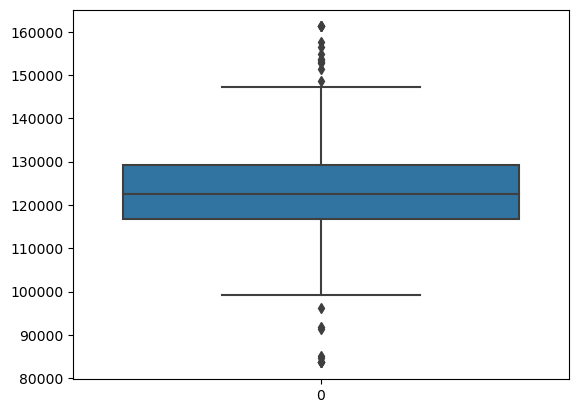

In [15]:
sns.boxplot(df['Administration'])

<Axes: xlabel='Marketing Spend', ylabel='Profit'>

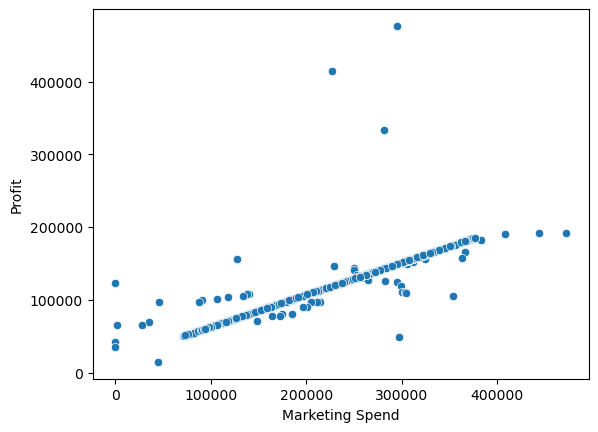

In [16]:
sns.scatterplot(df, x = 'Marketing Spend', y = 'Profit')

<Axes: xlabel='Administration', ylabel='Profit'>

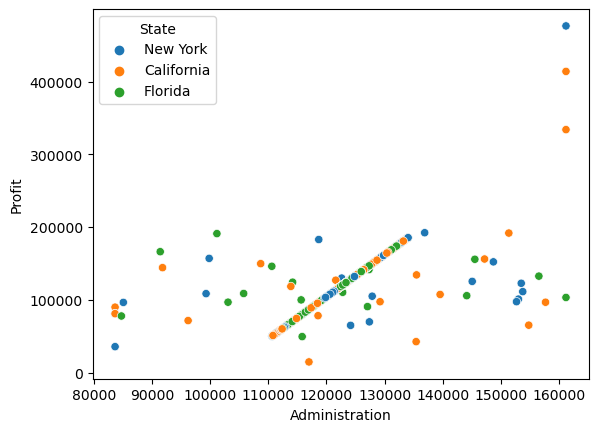

In [17]:
sns.scatterplot(df, x = 'Administration', y = 'Profit', hue= 'State')

[Text(0, 0, '118887'), Text(0, 0, '119475'), Text(0, 0, '120748')]

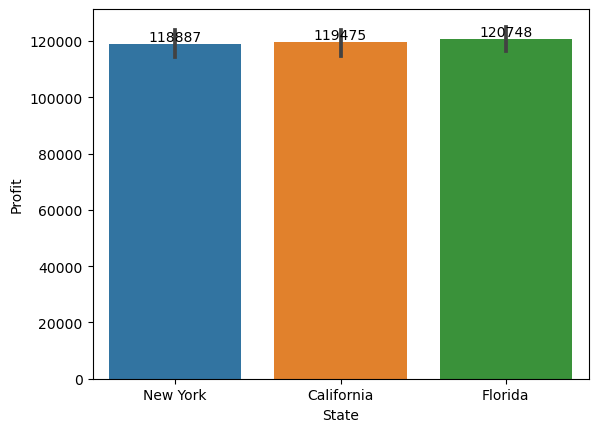

In [18]:
ax = sns.barplot(x='State', y='Profit', data=df)
ax.bar_label(ax.containers[0])

In [19]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [20]:
df1 = df[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']]

In [21]:
df1.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [22]:
df1.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.782682,0.978316,0.945030
Administration,0.782682,1.000000,0.719155,0.796719
Marketing Spend,0.978316,0.719155,1.000000,0.916944
Profit,0.945030,0.796719,0.916944,1.000000


<Axes: >

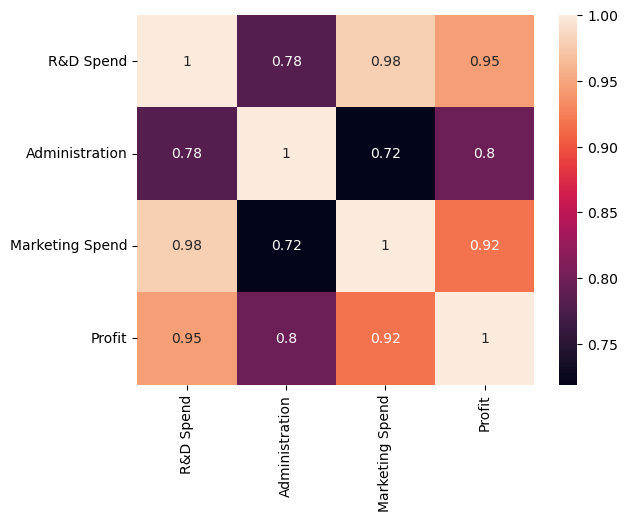

In [23]:
sns.heatmap(df1.corr(),annot=True)

## Model building 

In [24]:
## For model builing we will be considering only "Marketing Spend" column and we will try to predict 'Profit'
X = df[['Marketing Spend']]

In [25]:
X.head()

,Marketing Spend
0,471784.10
1,443898.53
2,407934.54
3,383199.62
4,366168.42


In [26]:
y = df[['Profit']]

In [27]:
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [28]:
## Splitting data into 80% train data and 20% test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
model = LinearRegression()

In [30]:
model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = model.predict(X_test)

In [32]:
print(f'Coefficient of determination is {r2_score(y_test, y_pred)}')

Coefficient of determination is 0.9765499903984266


In [33]:
Marketing_spent1 = [[700000]]
predicted_value = model.predict(Marketing_spent1)

C:\Users\rohan\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
print(f'Predicted profit for a campaign where we spend 700000 on Marketing is {predicted_value[0][0]}')

Predicted profit for a campaign where we spend 700000 on Marketing is 323044.53803305526
